In [1]:
kk 0

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!kk0:起始>^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [2]:
%precision 2
from numpy import random as nr

## 庞大的函数库

### 随机数

随机数

In [3]:
r1 = nr.rand(4, 3)   #0-1之间的随机数
r2 = nr.randn(4, 3)  #符合标准正态分布的随机数
r3 = nr.randint(0, 10, (4,3)) #指定范围内的随机证书
%C r1; r2; r3

         r1                      r2                 r3    
--------------------  -----------------------  -----------
[[0.58, 0.69, 0.4 ],  [[ 1.75,  1.19, -0.56],  [[3, 7, 7],
 [0.37, 0.26, 0.57],   [-0.07, -1.8 ,  0.58],   [8, 4, 3],
 [0.6 , 0.2 , 0.51],   [-0.76, -1.36,  0.06],   [9, 2, 2],
 [0.  , 0.84, 1.  ]]   [ 0.39,  0.52, -0.  ]]   [5, 1, 4]]


随机分布

In [4]:
r1 = nr.normal(100, 10, (4, 3)) #符合正态分布的随机数
r2 = nr.uniform(10, 20, (4, 3)) #符合均匀分布的随机数
r3 = nr.poisson(2.0, (4, 3))    #符合泊松分布的随机数
%C r1; r2; r3

            r1                         r2                 r3    
--------------------------  -----------------------  -----------
[[100.28,  99.54, 110.12],  [[16.26, 11.21, 15.98],  [[4, 2, 0],
 [100.17, 120.48,  98.19],   [12.78, 13.88, 14.91],   [2, 0, 2],
 [ 91.1 ,  96.24, 115.95],   [15.02, 17.8 , 16.24],   [1, 4, 0],
 [ 88.77,  98.11, 110.89]]   [11.24, 19.29, 16.86]]   [3, 3, 1]]


随机排序

In [5]:
a = np.array([1, 10, 20, 30, 40])
%P nr.permutation(10); nr.permutation(a)#返回新的数组

 1): [4 3 6 1 0 5 8 7 9 2],     2): [ 1 10 40 20 30],    


In [6]:
nr.shuffle(a) #对原始数组进行排序
a

array([ 1, 10, 30, 20, 40])

可重复抽样

In [7]:
a = np.arange(20, dtype=float)
c1 = nr.choice(a, size=(3, 4))
c2 = nr.choice(a, size=(3, 4), replace=False) #不可重复选取
c3 = nr.choice(a, size=(3, 4), p=a / np.sum(a)) # 数字越大抽取的概率越大
%C 5 c1; c2; c3

          c1                         c2                         c3          
----------------------     ----------------------     ----------------------
[[11., 11., 11.,  9.],     [[ 6.,  3., 18.,  9.],     [[10.,  6., 15., 19.],
 [15.,  3., 12., 10.],      [14., 17., 19., 12.],      [17.,  5., 15., 16.],
 [ 8.,  3., 10.,  7.]]      [ 2.,  7., 16.,  5.]]      [16.,  4., 19.,  2.]]


随机数种子: 种子相同产生的随机数相同

In [8]:
r1 = nr.randint(0, 100, 3)
r2 = nr.randint(0, 100, 3)
nr.seed(42)
r3 = nr.randint(0, 100, 3)
nr.seed(42)
r4 = nr.randint(0, 100, 3)
%C r1; r2; r3; r4

     r1            r2            r3            r4     
------------  ------------  ------------  ------------
[11, 98, 88]  [89, 15, 12]  [51, 92, 14]  [51, 92, 14]


### 求和、平均值、方差

**sum()**

In [9]:
nr.seed(42)
a = nr.randint(0,10,size=(2,3))
%C 5 a; np.sum(a); np.sum(a, axis=1); np.sum(a, axis=0)

     a          np.sum(a)     np.sum(a, axis=1)     np.sum(a, axis=0)
-----------     ---------     -----------------     -----------------
[[6, 3, 7],     35            [16, 19]              [10,  9, 16]     
 [4, 6, 9]]                                                          


In [10]:
nr.seed(42)
f = nr.randint(0,10,(2,3,4))
%C 5 f; np.sum(f, axis=(0, 2)); sum([6, 3, 7, 4]+[7, 2, 5, 4])

       f             np.sum(f, axis=(0, 2))     sum([6, 3, 7, 4]+[7, 2, 5, 4])
----------------     ----------------------     ------------------------------
[[[6, 3, 7, 4],      [38, 37, 39]               38                            
  [6, 9, 2, 6],                                                               
  [7, 4, 3, 7]],                                                              
                                                                              
 [[7, 2, 5, 4],                                                               
  [1, 7, 5, 1],                                                               
  [4, 0, 9, 5]]]                                                              


In [11]:
# keepdims参数设置是否保持原数组的维数
%C a; np.sum(a, 1, keepdims=False); np.sum(a, 1, keepdims=True)

     a       np.sum(a, 1, keepdims=False)  np.sum(a, 1, keepdims=True)
-----------  ----------------------------  ---------------------------
[[6, 3, 7],  [16, 19]                      [[16],                     
 [4, 6, 9]]                                 [19]]                     


In [12]:
# keepdims设置为True时, sum()得到的结果可以和原始数组进行广播运算
pa = a / np.sum(a, 1, dtype=float, keepdims=True) * 100
%C pa; pa.sum(1, keepdims=True)

           pa            pa.sum(1, keepdims=True)
-----------------------  ------------------------
[[37.5 , 18.75, 43.75],  [[100.],                
 [21.05, 31.58, 47.37]]   [100.]]                


In [13]:
#  sum()求和时注意查看结果的精度
b = np.full(1000000, 1.1, dtype=np.float32) # 创建一个很大的单精度浮点数数组
%C np.sum(b); np.sum(b,dtype=np.double)

np.sum(b)  np.sum(b,dtype=np.double)
---------  -------------------------
1099999.2  1100000.023841858        


**mean()**

In [14]:
np.mean(a,axis=1) # 默认双精度

array([5.33, 6.33])

**average()**: 有一个权重参数

In [15]:
score = np.array([83, 72, 79])
number = np.array([20, 15, 30])
%P np.average(score, weights=number)
%P np.sum(score * number) / np.sum(number, dtype=float)

 1): 78.61538461538461,    
 1): 78.61538461538461,    


**std()**: 计算数组的标准差;  
**var()**: 计算数组的方差;  

`偏样本方差`(ddot=0): $\large s_n^2 = \frac{1}{n} \Sigma_{i=1}^n(y_i-\bar{y})^2$.   
`无偏样本方差`(ddot=1): $\large s_n^2 = \frac{1}{n-1} \Sigma_{i=1}^n(y_i-\bar{y})^2$.  
因为n个数据点的信息量 = (n-1)个数据点的信息量+均值的信息量, 因此, $y_1到y_n$只有(n-1)个信息量;

In [16]:
a = nr.normal(0, 2.0, (100000, 10)) 
v1 = np.var(a, axis=1, ddof=0)
v2 = np.var(a, axis=1, ddof=1)
%C np.mean(v1); np.mean(v2)

   np.mean(v1)        np.mean(v2)    
-----------------  ------------------
3.603352705146314  4.0037252279403495


>无偏样本方差 == 总体方差, 偏样本方差 == 正态分布随机变量的最大似然估计

>最大似然估计: 找到一组参数(期望, 方差), 使得所用样本一起发生时概率最大

In [17]:
def normal_pdf(mean, var, x):
# 计算正态分布的概率密度的函数"
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(\
                                -(x - mean) ** 2 / (2 * var))
nr.seed(42)
np.set_printoptions(precision=2)
data = nr.normal(0, 2.0, size=10)                         
mean, var = np.mean(data), np.var(data)                   

var_range = np.linspace(max(var - 4, 0.1), var + 4, 100)  
# 产生一组方差值,调参

p = normal_pdf(mean, var_range[:, None], data)            
pp = np.product(p, axis=1)      

In [18]:
%C mean; var

       mean                var        
------------------  ------------------
0.8961222233975125  1.8818677808526267


In [19]:
data.shape, var_range[:, None].shape, p.shape, 

((10,), (100, 1), (100, 10))

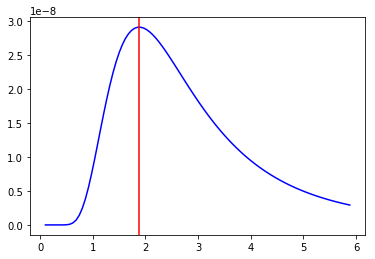

In [20]:
#偏样本方差位于似然估计曲线的最大值处
import pylab as pl
pl.plot(var_range, pp, 'b-')
pl.axvline(var, 0, 1, c="r")
pl.show()

### 大小与排序

min(), max() 都有axis, out, keepdims 等参数

ptp()计算最大值和最小值之间的差值

minimum(), maximum() 用于比较两个数组对应下标的元素, 两个数组形状不同时需要广播

In [21]:
a = np.array([1, 3, 5, 7])
b = np.array([2, 4, 6])
np.maximum(a[None, :], b[:, None])

array([[2, 3, 5, 7],
       [4, 4, 5, 7],
       [6, 6, 6, 7]])

argmax() 和 argmin() 计算最大值和最小值的地址, 如果不指定 axis,则返回平坦化之后的下标

In [22]:
np.random.seed(42)
a = np.random.randint(0, 10, size=(4, 5))
max_pos = np.argmax(a)
%C a; np.max(a); max_pos

        a          np.max(a)  max_pos
-----------------  ---------  -------
[[6, 3, 7, 4, 6],  9          5      
 [9, 2, 6, 7, 4],                    
 [3, 7, 7, 2, 5],                    
 [4, 1, 7, 5, 1]]                    


unravel_index 可以将一维数组的下标转化为多维数组的下标, 第一个参数是一位数组的下标, 第二个参数是多维数组的形状

In [23]:
idx = np.unravel_index(max_pos, a.shape)
%C idx; a[idx]

 idx    a[idx]
------  ------
(1, 0)  9     


In [24]:
idx = np.argmax(a, axis=1)
idx

array([2, 0, 1, 2], dtype=int64)

In [25]:
# 通过每行上最大值的地址取出每行上的最大值
a_rowmax=a[np.arange(a.shape[0]), idx]
%C a; idx; a_rowmax

        a              idx         a_rowmax  
-----------------  ------------  ------------
[[6, 3, 7, 4, 6],  [2, 0, 1, 2]  [7, 9, 7, 7]
 [9, 2, 6, 7, 4],                            
 [3, 7, 7, 2, 5],                            
 [4, 1, 7, 5, 1]]                            


sort()方法进行原位排序, sort()函数返回新的数组

axis 默认为-1, 沿着最后轴排序

axis=None 排序之前先进行平坦化

In [26]:
%C  np.sort(a); np.sort(a, axis=0)

    np.sort(a)     np.sort(a, axis=0)
-----------------  ------------------
[[3, 4, 6, 6, 7],  [[3, 1, 6, 2, 1], 
 [2, 4, 6, 7, 9],   [4, 2, 7, 4, 4], 
 [2, 3, 5, 7, 7],   [6, 3, 7, 5, 5], 
 [1, 1, 4, 5, 7]]   [9, 7, 7, 7, 6]] 


In [27]:
np.sort(a, axis=None) 

array([1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 9])

argsort() 返回数组元素被排序之前的下标(简称排序下)

In [28]:
sort_axis1 = np.argsort(a)
sort_axis0 = np.argsort(a, axis=0)
print "a:\n{} \n".format(a) 
%C sort_axis1;  sort_axis0

SyntaxError: invalid syntax (<ipython-input-28-ecb07ca03fd2>, line 3)

用排序下标计算排序数组

> 可以实现对两个相互关联的数组进行排序, 从数组a产生排序下标数组, 然后使用它对数组b进行排序.

`排序相关的函数和方法可以通过kind参数指定排序算法, 对于结构数组还可以通过oeder参数指定排序所使用的字段`

In [ ]:
# 原始数组的下标
axis0, axis1 = np.ogrid[:a.shape[0], :a.shape[1]]
%C axis0; axis1

In [ ]:
# 计算排序数组
%C a[axis0, sort_axis1]; a[sort_axis0, axis1]

lexsort()函数类似于Excel的多列排序, 他的参数是一个形状为(k,N)的数组,(或者k个序列,序列的长度是N), k 是特征的个数, N是样本的个数,最后的列为主键,主键相同时再按其他的键进行排序, 原始数组和参数数组互为转置

In [ ]:
names = ["zhang", "wang", "li", "wang", "zhang"]
ages = [37, 33, 32, 31, 36]
idx = np.lexsort([ages, names])
sorted_data = np.array(zip(names, ages), "O")[idx]
%C idx; sorted_data

In [ ]:
# 原始数组和参数数组互为转置
start_array = np.array(zip(names, ages), "O")
para_array = np.array([ages, names],'O')
print ("原始数组: \n {} \n 参数数组: \n {}").format(\
        start_array,        para_array)

In [ ]:
# 如果要对N行k列数组以第一列进行排序, 可以先对列进行 ::-1 反转
b = np.random.randint(0, 10, (5, 3))
%C b; b[:, ::-1]; b[:, ::-1].T

In [ ]:
# 原始数组和参数数组互为转置
%C b[np.lexsort(b.T)]; b[np.lexsort(b[:, ::-1].T)]

 partition() 和 argpartition() 对数组进行分割, 可以很快的找出排序之后的前k个元素, partition 的 第二个参数相当于分割点的位置  

In [ ]:
np.random.seed(0)
r = np.random.randint(10, 1000000, 100000)
%C np.sort(r)[:5]; np.partition(r, 5)[:5] 

In [ ]:
%timeit np.sort(r)[:5]
%timeit np.sort(np.partition(r, 5)[:5])

median() 获得数组的中位数,当数组的长度是偶数时, 返回两个值

In [ ]:
a_median = np.median(a, axis=1)
%C a; a_median

percentile() 计算百分位数, 将数值从小到大排列, 计算处于 p% 位置上的数值 

In [ ]:
r = np.abs(np.random.randn(100000))
np.percentile(r, [68.3, 95.4, 99.7])
# 正态随机分布的 1,2,3 倍标准差范围内的数据所占的百分比

searchsorted(a, v), 将数组 v 中的元素带到 a 中进行二分搜索, 函数返回要插入的位置, 默认从最左边插入, 可由side参数调节

In [ ]:
a = [2, 4, 8, 16, 16, 32]
v = [1, 5, 33, 16]
%C np.searchsorted(a, v); np.searchsorted(a, v, side="right")

有两个一维数组 x, y, 找到 y 中的每个元素在 x 中的位置, 如果元素不存在, 将下标设置为-1

In [ ]:
x = np.array([3, 5, 7, 1, 9, 8, 6, 10])
y = np.array([2, 1, 5, 10, 100, 6])

In [ ]:
def get_index_searchsorted(x, y):
    
    index = np.argsort(x)  
    # x 的排序下标 [3, 0, 1, 6, 2, 5, 4, 7]
    
    sorted_x = x[index]  
    # 排序好的 x 1~10
    
    sorted_index = np.searchsorted(sorted_x, y)  
    # y 中元素可插入 已排序 x 中的地址 [1, 0, 2, 7, 8, 3]
    
    # y 中元素在 x 中的地址     # 难
    yindex = np.take(index, sorted_index, mode="clip") 
    # clip 越界处理 地址8 
    
    mask = x[yindex] != y  
    # mask == [True, False, False, False,  True, False]
    
    yindex[mask] = -1
    
    return yindex

In [ ]:
get_index_searchsorted(x, y)

### 统计函数

unique()返回参数数组中所有不同的值, 并按顺序排列

In [ ]:
np.random.seed(42)
a = np.random.randint(0, 8, 10)
%C a; np.unique(a)

In [ ]:
#  return_index=True 一并返回结果数组在原始数组中的下标
x, index = np.unique(a, return_index=True)
%C x; index; a[index]

In [ ]:
# return_inverse=True 一并返回原始数组在结果数组中的下标
x, rindex = np.unique(a, return_inverse=True)
%C rindex; x[rindex]

bincount() 统计数组下标在数组元素中出现的次数, 问题取源于下标 0,1,2, ... 可以代表事物的类别, 因此可以很方面的计算类别的个数

In [ ]:
#  以索引为默认参数
np.bincount(a)

In [ ]:
# 可以给每个类别的每个元素一个权重
x = np.array([0  ,   1,   2,   2,   1,   1,   0])
w = np.array([0.1, 0.3, 0.2, 0.4, 0.5, 0.8, 1.2])
np.bincount(x, w)

In [ ]:
# 每个类别中元素的平均值
np.bincount(x, w) / np.bincount(x)

histgram() 对一维数组进行直方图统计

**histgram(,a ,bins range=None, weights=None, density=Fslse)**

In [ ]:
# bins 指定统计的区间个数 
# range 是一个长度为2的元组，表示统计的最小值和最大值
a = np.random.rand(100)
print a

np.histogram(a, bins=5, range=(0, 1))
# 指定5个区间，需要6个分割点，区间范围为（0,1）
# 输出每个区间上元素的个数，和区间的分割点

In [ ]:
# bins 也可以接收区间分割点列表，此时区间的划分可以是间隔不等的
np.histogram(a, bins=[0, 0.4, 0.8, 1.0])

In [ ]:
d = np.loadtxt("height.csv", delimiter=",")
%C d.shape; np.min(d[:, 0]); np.max(d[:, 0])
# 年龄范围做区间,(7,20)

In [ ]:
# weights参数以身高为权重，指定权重参数时, histgram()返回每个区间权重的和
cnts = np.histogram(d[:, 0], bins=range(7, 21))[0]
sums = np.histogram(d[:, 0], bins=range(7, 21), weights=d[:, 1])[0]

In [ ]:
#  cnts是每个年龄段的个数
cnts

In [ ]:
# sums时每个年龄段的身高总和
sums[:5]

In [ ]:
# 每个年龄段的身高平均值
sums / cnts

### 分段函数

判断表达式语法

In [ ]:
y,z = 1,0
x1 = y if y == 1 else z 
x0 = y if y != 1 else z
%C x1; x0

where()函数可以看做是判断表达式的数组版本

In [ ]:
x = np.arange(10) 
np.where(x < 5, 9 - x, x)

In [ ]:
# x 的形和congdition的形状相同, y, z,经过广播之后业与condition的形状相同
np.where(x > 6, 2 * x, 0)

where()计算P61的三角波形

In [ ]:
def triangle_wave1(x, c, c0, hc):
    x = x - x.astype(np.int) # 三角波的周期为1，因此只取x坐标的小数部分进行计算
    return np.where(x >= c, 0,\
                    np.where(x < c0,x / c0 * hc, \
                             (c - x) / (c - c0) * hc))

where()嵌套超过两个,可以用select()函数

select(condlist, choicelist, default)

condilist 是自变量列表, choicelist 是段函数列表, 两者一一对应.

In [ ]:
def triangle_wave2(x, c, c0, hc):
    x = x - x.astype(np.int)
    return np.select([x >= c, x < c0 , True            ], 
                      [0     , x/c0*hc, (c-x)/(c-c0)*hc])

调用 where()函数和select()函数时将会发生大量的内存分配和释放, 因此当输入数组 x 很大时, 用 piecewise()函数计算分段函数值

piecewise(x,condlist, funclist)

In [ ]:
def triangle_wave3(x, c, c0, hc):
    x = x - x.astype(np.int)
    return np.piecewise(x, [x >= c, x < c0], #condlist 的长度可以比funclist的长度少1 
        [0,  # x>=c 
        lambda x: x / c0 * hc, # x<c0
        lambda x: (c - x) / (c - c0) * hc])  # else

In [ ]:
x = np.linspace(0, 2, 10000) 
y1 = triangle_wave1(x, 0.6, 0.4, 1.0)
y2 = triangle_wave2(x, 0.6, 0.4, 1.0)
y3 = triangle_wave3(x, 0.6, 0.4, 1.0)
np.all(y1 == y2), np.all(y1 == y3)

In [ ]:
%timeit triangle_wave1(x, 0.6, 0.4, 1.0)
%timeit triangle_wave2(x, 0.6, 0.4, 1.0)
%timeit triangle_wave3(x, 0.6, 0.4, 1.0)

### 操作多维数组

concatenate 是连接多个数组最基本的函数, vstack, hstack, colum_stack 都是其便捷形式

In [ ]:
a = np.arange(3)
b = np.arange(10, 13)

In [ ]:
%C a; b

In [ ]:
v = np.vstack((a, b))
h = np.hstack((a, b))
c = np.column_stack((a, b))
%C v; h; c

np.c_[] 对象也可以按列连接数组

In [ ]:
np.c_[a, b, a+b]

split(), array_split(),用法基本相同, 将一个数组沿着指定轴分成多个数组, 可以指定切分轴上的切分点下标

In [ ]:
np.random.seed(42)
a = np.random.randint(0, 10, 12)
a

把随机数 a 切分为多个数组, 保证每个数组的元素都是升序排列的, 首先计算切分点坐标

In [ ]:
idx = np.nonzero(np.diff(a) < 0)[0] + 1
# nonzero 只返回元素不为0的地址
# diff和nonzero获得的是每个升序片段的最后一个元素的下标, 
# 切分点为每个片段第一个 元素的下标

%C idx; np.split(a, idx)

第二个参数是整数时, 表示分组的个数,split()只能平均分组, array_split()尽可能的平均分组

In [ ]:
%C  np.split(a, 6); np.array_split(a, 5)

transpote, 和 swapaxes 用于修改周到顺序, 得到原数组的视图

In [ ]:
a = np.random.randint(0, 10, (2, 3, 4, 5))
print u"原数组形状:", a.shape
print u"transpose:", np.transpose(a, axes = (1, 2, 0, 3)).shape
#  默认将整个轴进行翻转
# 参数 axes 代表原始轴的新顺序 
print u"swapaxes:", np.swapaxes(a, 1, 2).shape

将多个缩略图拼接成一个大图, 理解多维数组中变换轴顺序的应用

In [ ]:
import glob
import numpy as np
from cv2 import imread, imwrite

imgs = []
for fn in glob.glob("thumbnails/*.png"):
    imgs.append(imread(fn, -1))
    
print imgs[0].shape

In [ ]:
img = np.concatenate(imgs, 0)
img.shape

In [ ]:
img1 = img.reshape(6, 5, 90, 160, 3)
img1[0, 1].shape

In [ ]:
img2 = img1.swapaxes(1, 2).reshape(540, 800, 3)

In [ ]:
img = np.concatenate(imgs, 0)

In [ ]:
img3 = img.reshape(5, 6, 90, 160, 3) \
          .transpose(1, 2, 0, 3, 4)  \
          .reshape(540, 800, 3)

In [ ]:
img = np.concatenate(imgs, 0)
img1 = img.reshape(6, 5, 90, 160, 3)
mask = np.ones(img1.shape[:-1], dtype=bool) 
mask[:, :, 2:-2, 2:-2] = False              
img1[mask] = 230                            
img4 = img1.swapaxes(1, 2).reshape(540, 800, 3)

In [ ]:
# 使用操作多维数组的函数拼接多幅缩略图
import pylab as pl

fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(15, 6))
ax1.imshow(img2[:, :, ::-1])
ax2.imshow(img4[:, :, ::-1])
ax1.axis("off")
ax2.axis("off")
fig.subplots_adjust(0, 0, 1, 1, 0.02, 0)
pl.show(fig)

### 多项式函数

polyld 一元多项式对象

In [ ]:
a = np.array([1.0, 0, -2, 1])
p = np.poly1d(a)
print type(p)

像函数一样调用一元多项式对象

In [ ]:
p(np.linspace(0, 1, 5))     

多项式函数的加减乘除和polyld对象的加减乘除一一对应

In [ ]:
p + [-2, 1] # 和 p + np.poly1d([-2, 1]) 相同

In [ ]:
p * p # 两个3次多项式相乘得到一个6次多项式

In [ ]:
p / [1, 1] # 除法返回两个多项式，分别为商式和余式

In [ ]:
p == np.poly1d([ 1., -1., -1.]) * [1,1] + 2 # 商式和被除数相乘再加上余数等于原式

多项式的 deriv(), 和 integ() 方法可以计算多项式函数的微分和积分

In [ ]:
p.deriv()

In [ ]:
p.integ()

In [ ]:
p.integ().deriv() == p

roots()函数计算多项式函数的根

In [ ]:
r = np.roots(p)
r

In [ ]:
p(r) # 将根带入多项式计算，得到的值近似为0

poly 函数可以将根转换回多项式的系数

In [ ]:
np.poly(r)

numpy 也提供了操作多项式数组的函数.

np.poly()函数可以对一维数据使用多项式函数进行拟合, 找到这组数据的误差平方和最小的多项式系数

np.polyval()函数计算多项式函数的值

In [ ]:
np.polymul([1,1],[1,1]) 
# 计算多项式函数的乘积.

In [ ]:
np.set_printoptions(suppress=True, precision=4)

x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
y = np.sin(x)  

for deg in [3, 5, 7]:
#     多项式函数的最高阶数
    a = np.polyfit(x, y, deg)  # a 是拟合后的多项式函数
    error = np.abs(np.polyval(a, x) - y)  
    
    print "degree {}: {}".format(deg, a)
    print "max error of order %d:" % deg, np.max(error)

In [ ]:
#%figonly=各阶 多项式近似正弦函数 的误差
pl.figure(figsize=(8, 4))

x = np.linspace(-np.pi / 2, np.pi / 2, 500)
y = np.sin(x)

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x) - y)
    pl.semilogy(x, error, label=u"{}阶多项式的误差".format(deg))
pl.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=3, fancybox=True)
pl.axis('tight');
pl.show()

### 多项式函数类

np.polynomial 模块提供了更丰富的多项式函数类, 例如 Polynomial, Chebyshev, Legendre 等. 系数按照幂次从小到大的顺序排列

In [ ]:
from numpy.polynomial import Polynomial, Chebyshev
p = Polynomial([1, -2, 0, 1])
print p(2.0)

Polynomial 对象提供了众多的方法对多项式进行操作

In [ ]:
p.deriv()
#  p的所有阶导函数

切比雪夫多项式是一个正交多项式序列, 一个n次多项式可以表示为多个切比雪夫多项式的加权和

In [ ]:
Chebyshev.basis(4)
#  T4(x) = 1-8x^2+8x^4

In [ ]:
Chebyshev.basis(4).convert(kind=Polynomial)
#  T4(x) = 1-8x^2+8x^4

In [ ]:
#%figonly=0到4次切比雪夫多项式
x = np.linspace(-1, 1, 100)
for i in range(5):
    ax = pl.plot(x, Chebyshev.basis(i)(x), lw=2, label="$T_%d$" % i)
pl.ylim(-1.5, 1.5)
pl.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=5, fancybox=True);

切比雪夫多项式的根称为切比雪夫节点, 可以用于多项式插值, 相应的插值多项式能最大限度的降低龙格现象, 并且提供多项式在连续函数的最佳一致逼近

In [ ]:
def f(x):
    return 1.0 / ( 1 + 25 * x**2)

n = 11
x1 = np.linspace(-1, 1, n) #等距离取点
x2 = Chebyshev.basis(n).roots() #按切比雪夫节点集取点
xd = np.linspace(-1, 1, 200) # 所有函数的自变量范围

# 用两周取样点分别对f(x)进行多项式插值
#  n 个系数最高幂次是（n-1）
p1 = Chebyshev.fit(x1, f(x1), n - 1, domain=[-1, 1]) 
p2 = Chebyshev.fit(x2, f(x2), n - 1, domain=[-1, 1])

print u"插值多项式的最大误差：",
print u"等距离取样点：", abs(p1(xd) - f(xd)).max(),
print u"切比雪夫节点：", abs(p2(xd) - f(xd)).max()

In [ ]:
#%figonly=等距离插值点（左）、切比雪夫插值点（右）
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 4))

# 等距离取点得到的多项式函数
ax1.plot(xd, f(xd), "--", label=u"$f(x)$")
ax1.plot(x1, f(x1), "o", label=u"插值点")
ax1.plot(xd, p1(xd), label=u"插值多项式")

ax1.legend(loc="upper center")

# 切夫雪比节点取点得到的多项式和函数
ax2.plot(xd, f(xd), "--")
ax2.plot(x2, f(x2), "o")
ax2.plot(xd, p2(xd));

使用切比雪夫多项式进行插值的误差比一般多项式要小的多

In [ ]:
def g(x):
    x = (x - 1) * 5
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n).roots()
xd = np.linspace(-1, 1, 1000)

p_g = Polynomial.fit(x, g(x), n - 1, domain=[-1, 1])
c_g = Chebyshev.fit(x, g(x), n - 1, domain=[-1, 1])

print "Max Polynomial Error:", abs(g(xd) - p_g(xd)).max()
print "Max Chebyshev Error:", abs(g(xd) - c_g(xd)).max()

In [ ]:
#%figonly=Chebyshev插值与Polynomial插值比较
pl.figure(figsize=(9, 4))

pl.plot(xd, g(xd), "k--", label="$g(x)$")
pl.plot(xd, c_g(xd), "b-", alpha=0.6, label=u"Chebyshev fit")
pl.plot(xd, p_g(xd), "r-", alpha=0.6, label=u"Polynomial fit")

pl.legend(loc="best");

trim() 可以根据精度要求自动将高次系数截断, tol 参数是尾部精度控制的关键字参数

In [ ]:
c_trimed = c_g.trim(tol=0.05)
print "degree:", c_trimed.degree()
print "error:", abs(g(xd) - c_trimed(xd)).max()

In [ ]:
# 函数h(x)的19阶切比雪夫多项式插值
def h(x):
    x = 5 * x
    return np.exp(-x**2 / 10)

n = 20
x = Chebyshev.basis(n).roots()
c_h = Chebyshev.fit(x, h(x), n - 1, domain=[-1, 1])

print "Max Chebyshev Error:", abs(h(xd) - c_h(xd)).max()

多项式类支持四则运算

In [ ]:
c_diff = c_g - c_h
roots = c_diff.roots()
real_roots = roots[roots.imag == 0].real
print np.allclose(c_diff(real_roots), 0)

***
roots[roots.imag == 0].real, 取出复数数组中所有的实数元素
***

In [ ]:
%C roots.shape; roots.imag.shape; roots.real.shape

In [ ]:
roots[:10]

In [ ]:
(roots.imag == 0)[:10]

In [ ]:
roots[(roots.imag == 0)[:10]]

In [ ]:
roots[(roots.imag == 0)[:10]].real

******

In [ ]:
#%figonly=使用Chebyshev插值计算两条曲线在[-1, 1]之间的所有交点
pl.figure(figsize=(9, 4))
pl.plot(xd, g(xd))
pl.plot(xd, h(xd))
pl.plot(real_roots, h(real_roots), "kx", markeredgewidth=1)
pl.xlim(-1, 1);

切比雪夫多项式在区间[-1,1]上为正交多项式,只有在该区间上才能对目标函数进行插值, 为了对任何区域的目标函数进行插值, 需要对自变量的区间进行平移和缩放. domain参数指定拟合点的区间, 在通过basis()方法创建Tn(x)和调用fit方法进行拟合时,都要设置同样的domain参数

In [ ]:
def g2(x):
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n, domain=[-10, 0]).roots() 
xd = np.linspace(-10, 0, 1000)

c_g2 = Chebyshev.fit(x, g2(x), n - 1, domain=[-10, 0]) 

print "Max Chebyshev Error:", abs(g2(xd) - c_g2(xd)).max() 

### 各种乘积运算

None作一维数组的下标, 可以将一维数组变为二维数组

In [ ]:
a = np.array([1, 2, 3])
%C a[:, None]; a[None, :]

点积 dot() 计算矩阵乘积

**dot(a, b)[i, j, k, m]=sum(a[i, j, :] * b[ k, :, m])**

In [ ]:
x = np.arange(9).reshape(3,3)
y = np.full((3,3),1)
z = np.dot(x,y)

%C x; y; z

>三维数组相乘,用第一个数组的2轴和1轴,第二个数组的2轴和0轴定位,其余轴对应求和得
元素值

In [ ]:
a = np.arange(12).reshape(2, 3, 2)
b = np.arange(12, 24).reshape(2, 2, 3)
c = np.dot(a, b)
%C a; b; c; c.shape

内积 inner() 计算两个数组对应下标元素的乘积和

**inner(a, b)[i, j, k, m] = sum(a[i, j, :) * b[k, m, :]**

In [ ]:
a = np.arange(12).reshape(2, 3, 2)
b = np.arange(12, 24).reshape(2, 3, 2)
c = np.inner(a, b)
%C a; b; c; c.shape

外积只对一位数组进行运算,如果传入的是多维数组,则先将次数组平坦化为一维数组.它计算列向量和行向量的矩阵乘积

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6, 7])
%C np.outer(a, b); np.dot(a[:, None], b[None, :])

张量积 tensordot() 将数组 a,b 指定轴上的对应元素相乘并求和

In [ ]:
np.random.seed(0)
a = np.random.randint(0,5,size=(3, 4))
b = np.random.randint(0,5,size=(4, 5))

c1 = np.tensordot(a, b, axes=[[1], [0]]) 
c2 = np.tensordot(a, b, axes=1) # a 的后一个轴与 b 的前一个轴          
c3 = np.dot(a, b)
c4 = np.tensordot(a, b, axes=[[-1], [-2]]) # a的最后轴,b的倒数第二轴

In [ ]:
%C a; b

In [ ]:
%C c1; c2

In [ ]:
%C c3; c4

### 广义ufunc函数

> NumPy中的线性代数模块`linalg`中提供的函数大都为广义ufunc函数。在SciPy中也提供了线性代数模块`linalg`，但其中的函数都是一般函数，只能对单个矩阵进行计算

将单个矩阵的运算运用到整个数组之上的函数叫做 gufunc

In [ ]:
a = np.random.rand(10, 20, 3, 3) #产生10x20个3x3矩阵
a_inv = np.linalg.inv(a) # np.linalg.inv()是gufunc 对200个3x3矩阵求逆
a_inv.shape # 返回数组的形状和原始数组的形状相同

In [ ]:
i, j = 3, 4 # 第四个三维数组, 第五个二维数组
np.allclose(np.dot(a[i, j], a_inv[i, j]), np.eye(3))

np.linalg.inv(a) gufunc 求逆
np.linalg.det(a) gufunc 求行列式

In [ ]:
a_det = np.linalg.det(a) # 所有MM方阵替换成了它的det值
a_det.shape

对 10000*10 的数据集进行二次函数拟合

In [ ]:
n = 10000
np.random.seed(0)
beta = np.random.rand(n, 3) 
x = np.random.rand(n, 10)
y = beta[:,2, None] + x*beta[:, 1, None] + x**2*beta[:, 0, None]
y.shape
# 虽然下标元组有三个元素,但是得到的是二维数组,保持了beta的维数

In [ ]:
# 输出第 42 组的实际系数以及拟合的结果
print beta[42]
print np.polyfit(x[42], y[42], 2) # 用一行中的十个特征拟合三个系数

In [ ]:
np.allclose(beta, beta2) # 自己拟合的系数与原始系数近似相同

In [ ]:
np.vstack??

In [ ]:
# 循环调运n次polyfit可得完整的系数矩阵
%time beta_for = np.vstack([np.polyfit(x[i], y[i], 2) for i in range(n)])
# vstack 按行堆叠数组 因为每次polyfit返回一个长度为3的一维数组

numpy.polyfit()实际上是通过最小二乘法函数numpy.linalg.lstq()来实现多项式拟合的

In [ ]:
xx = np.column_stack(([x[42]**2, x[42], np.ones_like(x[42])])) 
#x[42]=x[42,:]
#  将三行元素排组合成三列

print np.linalg.lstsq(xx, y[42])[0]
#  分别对应二次函数的系数a,b,c

In [ ]:
%%time
X = np.dstack([x**2, x, np.ones_like(x)])
Xt = X.swapaxes(-1, -2)

import numpy.core.umath_tests as umath
A = umath.matrix_multiply(Xt, X)
b = umath.matrix_multiply(Xt, y[..., None]).squeeze()

beta3 = np.linalg.solve(A, b)

print np.allclose(beta3, beta2)

In [ ]:
M = np.array([[[np.cos(t), -np.sin(t)], 
               [np.sin(t), np.cos(t)]]
             for t in np.linspace(0, np.pi, 4, endpoint=False)])

x = np.linspace(-1, 1, 100)
points = np.array((np.c_[x, x], np.c_[x, x**3], np.c_[x**3, x]))

rpoints = umath.matrix_multiply(points, M[:, None, ...])

print points.shape, M.shape, rpoints.shape

In [ ]:
# 使用矩阵乘积的广播运算将3条曲线分别旋转4个角度
import pylab as pl

pl.figure(figsize=(6, 6))
for t in rpoints.reshape(-1, 100, 2):
    pl.plot(t[:,0], t[:,1], "b+", lw=2)
ax = pl.gca()
ax.set_aspect("equal")
ax.axis("off");